In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import pandas as pd
import osmnx as ox

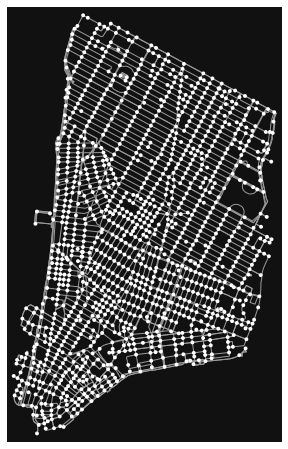

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [2]:
G = ox.io.load_graphml('../../data/consolidated_mnh_below_34th.graphml')
ox.plot.plot_graph(G)

In [3]:
danger_df = pd.read_pickle('../../data/consolidated_danger_by_node_id.pkl.gz')
danger_df

,DANGER,OLD_NODE_IDS,CENSUS_TRACT_ID
0,0.000000,[42421828],2800
1,4.722819,[42430942],2400
2,3.771228,[42430938],2800
3,0.000000,"[42421837, 5481976931, 5481976926]",2800
4,4.090534,"[42421877, 8475999052, 42433354, 42437949, 830...",6300
...,...,...,...
1258,2.933979,[8095882130],1300
1259,0.000000,[42446678],9900
1260,0.000000,"[8288262780, 8288262779]",6900
1261,0.000000,[8288560711],9900


I guess what we'd want to do here is just have the circle scale in size corresponding to that and then also have a low alpha channel so that they blend together.

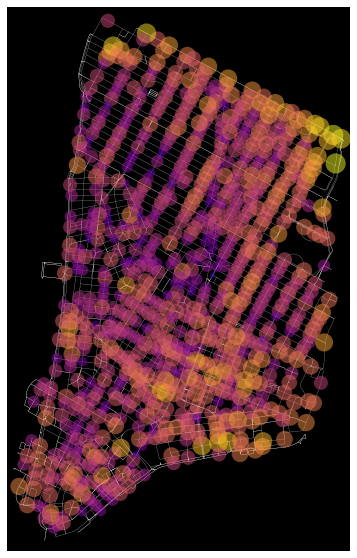

(<Figure size 720x720 with 1 Axes>, <AxesSubplot:>)

In [4]:
# Now we set the node attributes to be this crash count
nx.set_node_attributes(G, dict(danger_df.DANGER), "danger")
# Now we map these to colors
nc = ox.plot.get_node_colors_by_attr(G, "danger", cmap="plasma")

# Now we plot the graph with the colors
ox.plot_graph(
    G,
    figsize=(10, 10),
    node_color=nc,
    node_size=danger_df.DANGER * 64,
    node_alpha=0.5,
    node_zorder=2,
    edge_linewidth=0.2,
    edge_color="w",
    bgcolor="k",
)

In [33]:
ns = pd.DataFrame(G.nodes.values())

ns = gpd.GeoDataFrame(data=ns, geometry=gpd.points_from_xy(ns.x, ns.y), crs='EPSG:32618').to_crs('EPSG:4326')

In [37]:
ns

,osmid_original,y,x,street_count,danger,lon,lat,highway,geometry
0,42421828,4.508770e+06,586459.280719,3.0,0.000000,-73.976212,40.725326,NaN,POINT (-73.97621 40.72533)
1,42430942,4.508722e+06,586548.367848,4.0,4.722819,-73.975164,40.724877,traffic_signals,POINT (-73.97516 40.72488)
2,42430938,4.508831e+06,586346.713008,4.0,3.771228,-73.977536,40.725883,traffic_signals,POINT (-73.97754 40.72588)
3,"[42421837, 5481976931, 5481976926]",4.508908e+06,586564.151727,NaN,0.000000,NaN,NaN,NaN,POINT (-73.97495 40.72655)
4,"[42421877, 8475999052, 42433354, 42437949, 830...",4.509534e+06,584759.228753,NaN,4.090534,NaN,NaN,NaN,POINT (-73.99624 40.73238)
...,...,...,...,...,...,...,...,...,...
1258,8095882130,4.507237e+06,583663.063274,3.0,2.933979,-74.009523,40.711806,NaN,POINT (-74.00952 40.71181)
1259,42446678,4.512180e+06,583964.409871,3.0,0.000000,-74.005293,40.756296,NaN,POINT (-74.00529 40.75630)
1260,"[8288262780, 8288262779]",4.509302e+06,583287.131348,NaN,0.000000,NaN,NaN,NaN,POINT (-74.01370 40.73044)
1261,8288560711,4.511086e+06,583721.549163,3.0,0.000000,-74.008316,40.746469,NaN,POINT (-74.00832 40.74647)


/usr/local/Caskroom/miniconda/base/envs/spokenv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/Caskroom/miniconda/base/envs/spokenv/lib/python3.8/site-packages/seaborn/distributions.py:1718: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/Caskroom/miniconda/base/envs/spokenv/lib/python3.8/site-packages/cartopy/crs.py:825: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/usr/local/Caskroom/miniconda/base/envs/

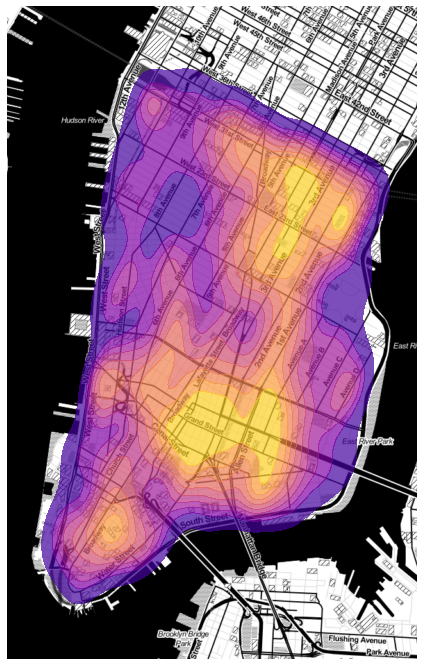

In [48]:
import geopandas as gpd
import geoplot as gplt
import geoplot.crs as gcrs
import contextily as cpr

ax = gplt.kdeplot(ns, weights=ns.danger, bw_adjust=0.5, cmap='plasma', projection=gcrs.WebMercator(), fill=True, figsize=(12, 12), alpha=0.7)
gplt.webmap(ns, provider=cpr.providers.Stamen.Toner, ax=ax)
plt.show()

* TODO: Actually make this use the danger values you dingus
* TODO: Use this plot, which gives us the density of intersections, to sample to neighborhood's intersection density at each node and then correlate that with the danger of each node
* TODO: Overlay the heatmap over the street grid for aided interpretability